# Twitter Sentiment Analysis of Got Season 8:

### Thirumurugan Ramar

In [1]:
# import data
import re 
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
got_s8 = pd.read_csv('gotTwitter.csv')

In [3]:
got_s8.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x51554079,x1118417386150014976,2019-04-17 07:34:18,moevazquez,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,IFTTT,99,NaN,NaN,NaN,...,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079/1496110868,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/978884893261299713/_rS8KmE9_normal.jpg
1,x51554079,x1117994592136249344,2019-04-16 03:34:16,moevazquez,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,IFTTT,77,NaN,NaN,NaN,...,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079/1496110868,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/978884893261299713/_rS8KmE9_normal.jpg
2,x51554079,x1117987511391981568,2019-04-16 03:06:08,moevazquez,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,IFTTT,80,NaN,NaN,NaN,...,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079/1496110868,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/978884893261299713/_rS8KmE9_normal.jpg
3,x51554079,x1118410676475760640,2019-04-17 07:07:38,moevazquez,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,IFTTT,102,NaN,NaN,NaN,...,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079/1496110868,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/978884893261299713/_rS8KmE9_normal.jpg
4,x770111944187580416,x1118417347495251968,2019-04-17 07:34:09,whoisScottyP,@MrLegenDarius unpopular opinion: game of thrones edition,Twitter for iPhone,42,x1118398110810681345,x37078228,MrLegenDarius,...,1602,25651,2016-08-29 04:12:50,False,NaN,NaN,en,https://pbs.twimg.com/profile_banners/770111944187580416/1553048869,NaN,http://pbs.twimg.com/profile_images/1108193461373673472/DHmsISfQ_normal.jpg


In [4]:
got = got_s8[["text","display_text_width","favourites_count","account_lang"]]

In [5]:
got.head(15)

,text,display_text_width,favourites_count,account_lang
0,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,99,36131,es
1,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,77,36131,es
2,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,80,36131,es
3,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,102,36131,es
4,@MrLegenDarius unpopular opinion: game of thrones edition,42,25651,en
5,Reddit Is Bursting With 'Game of Thrones' Theories About Bran Stark - SheKnows https://t.co/CUBvMrLUYi,102,265,en
6,Reddit Is Bursting With 'Game of Thrones' Theories About Bran Stark - SheKnows https://t.co/CUBvMrLUYi,102,265,en
7,10 'Game Of Thrones' Season 8 Reddit Theories That Will Rock Your World - Elite Daily https://t.co/bH2Bdaf7Au,109,265,en
8,What Reddit's 'Game of Thrones' fans really thought of the Season 8 premiere - USA TODAY https://t.co/heJIl0jspY,112,265,en
9,GAME OF THRONES Star John Bradley Explains [SPOILER] from the S8 Premiere https://t.co/9nTkJniPO8 #comics #grahicnovel,118,9276,en


In [6]:
got.shape

(760660, 4)

In [7]:
#function to remove unwanted text patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [8]:
got["favourites_count"].mean()

13105.644030184314

In [9]:
got.drop(got[got['favourites_count'] < 10000].index, inplace = True) 

In [10]:
got.shape

(232907, 4)

In [11]:
got['tidy_tweet'] = np.vectorize(remove_pattern)(got['text'], "@[\w]*") 

In [12]:
got.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet
0,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,99,36131,es,👍 on : GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL
1,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,77,36131,es,👍 on : Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS
2,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,80,36131,es,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS
3,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,102,36131,es,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL
4,@MrLegenDarius unpopular opinion: game of thrones edition,42,25651,en,unpopular opinion: game of thrones edition


In [13]:
got['tidy_tweet'] = got['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [14]:
got.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet
0,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,99,36131,es,on GAME OF THRONES x Breakdown Night King Symbol Explained https t co Ig QyNPtkL
1,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,77,36131,es,on Ups and Downs From Game Of Thrones https t co CZndqySpWS
2,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,80,36131,es,Liked on YouTube Ups and Downs From Game Of Thrones https t co CZndqySpWS
3,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,102,36131,es,Liked on YouTube GAME OF THRONES x Breakdown Night King Symbol Explained https t co Ig QyNPtkL
4,@MrLegenDarius unpopular opinion: game of thrones edition,42,25651,en,unpopular opinion game of thrones edition


In [15]:
got['tidy_tweet'] = got['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
got.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet
0,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,99,36131,es,GAME THRONES Breakdown Night King Symbol Explained https QyNPtkL
1,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,77,36131,es,Downs From Game Thrones https CZndqySpWS
2,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,80,36131,es,Liked YouTube Downs From Game Thrones https CZndqySpWS
3,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,102,36131,es,Liked YouTube GAME THRONES Breakdown Night King Symbol Explained https QyNPtkL
4,@MrLegenDarius unpopular opinion: game of thrones edition,42,25651,en,unpopular opinion game thrones edition


In [17]:
tokenized_tweet = got['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [18]:
tokenized_tweet.head()

0                    [GAME, THRONES, Breakdown, Night, King, Symbol, Explained, https, QyNPtkL]
1                                               [Downs, From, Game, Thrones, https, CZndqySpWS]
2                               [Liked, YouTube, Downs, From, Game, Thrones, https, CZndqySpWS]
3    [Liked, YouTube, GAME, THRONES, Breakdown, Night, King, Symbol, Explained, https, QyNPtkL]
4                                                  [unpopular, opinion, game, thrones, edition]
Name: tidy_tweet, dtype: object

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [20]:
tokenized_tweet.head()

0                  [game, throne, breakdown, night, king, symbol, explain, http, qynptkl]
1                                             [down, from, game, throne, http, czndqyspw]
2                               [like, youtub, down, from, game, throne, http, czndqyspw]
3    [like, youtub, game, throne, breakdown, night, king, symbol, explain, http, qynptkl]
4                                                [unpopular, opinion, game, throne, edit]
Name: tidy_tweet, dtype: object

In [21]:
tokenized_tweet =  tokenized_tweet.str.join(' ')

In [22]:
tokenized_tweet.head()

0                game throne breakdown night king symbol explain http qynptkl
1                                        down from game throne http czndqyspw
2                            like youtub down from game throne http czndqyspw
3    like youtub game throne breakdown night king symbol explain http qynptkl
4                                          unpopular opinion game throne edit
Name: tidy_tweet, dtype: object

In [23]:
got['tidy_tweet'] = tokenized_tweet

In [24]:
got.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet
0,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,99,36131,es,game throne breakdown night king symbol explain http qynptkl
1,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,77,36131,es,down from game throne http czndqyspw
2,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,80,36131,es,like youtub down from game throne http czndqyspw
3,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,102,36131,es,like youtub game throne breakdown night king symbol explain http qynptkl
4,@MrLegenDarius unpopular opinion: game of thrones edition,42,25651,en,unpopular opinion game throne edit


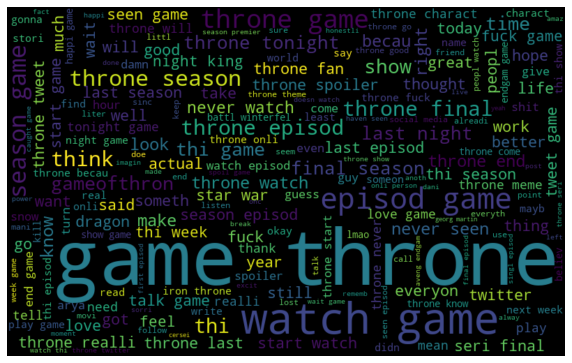

In [25]:
all_words = ' '.join([text for text in got['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [26]:
import sys
!{sys.executable} -m pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\manikandan\anaconda3\envs\tensorflow-sessions\lib\site-packages (3.8.1)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [28]:
tokenized_tweet = got['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(got['tidy_tweet']), epochs=20)

(38063930, 54321260)

In [29]:
model_w2v.wv.most_similar(positive="tyrion")

[('euhm', 0.4800606071949005),
 ('chiva', 0.4755781590938568),
 ('lannist', 0.4729728102684021),
 ('biggi', 0.46852752566337585),
 ('cersei', 0.46700412034988403),
 ('deathwatch', 0.4650922417640686),
 ('notori', 0.46193256974220276),
 ('tyron', 0.4605390429496765),
 ('jaim', 0.45844346284866333),
 ('simp', 0.45210975408554077)]

In [30]:
model_w2v.wv.most_similar(positive="john")

[('wick', 0.6811492443084717),
 ('bradley', 0.5435466766357422),
 ('malkovich', 0.537111222743988),
 ('parabellum', 0.5360229015350342),
 ('epidemiolog', 0.5142534971237183),
 ('goodman', 0.5069799423217773),
 ('booksmart', 0.49358415603637695),
 ('aeryn', 0.4874650835990906),
 ('mulaney', 0.47965008020401),
 ('oliv', 0.47918596863746643)]

In [31]:
model_w2v.wv.most_similar(positive="dragon")

[('drogon', 0.505757212638855),
 ('dvbx', 0.49794793128967285),
 ('toothless', 0.49653157591819763),
 ('#gamefthronesfinal', 0.4918782114982605),
 ('namesak', 0.4852626323699951),
 ('fuse', 0.4813588857650757),
 ('asshai', 0.4757692217826843),
 ('quidditch', 0.4697577953338623),
 ('#nationalpetday', 0.46508947014808655),
 ('fightin', 0.4641515016555786)]

In [32]:
model_w2v.wv.most_similar(positive="final")

[('season', 0.5696620941162109),
 ('last', 0.5598223209381104),
 ('jist', 0.5547001361846924),
 ('throne', 0.5495799779891968),
 ('ohtezrg', 0.5470665097236633),
 ('whewwwww', 0.5448064804077148),
 ('end', 0.5382673740386963),
 ('tbyrhjn', 0.5370198488235474),
 ('game', 0.5338363647460938),
 ('mpqjn', 0.5329418182373047)]

In [33]:
from textblob import TextBlob
got['polarity'] = got.apply(lambda x: TextBlob(x['tidy_tweet']).sentiment.polarity, axis=1)
got['subjectivity'] = got.apply(lambda x: TextBlob(x['tidy_tweet']).sentiment.subjectivity, axis=1)

In [34]:
got.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet,polarity,subjectivity
0,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,99,36131,es,game throne breakdown night king symbol explain http qynptkl,-0.400000,0.400000
1,👍 on @YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,77,36131,es,down from game throne http czndqyspw,-0.277778,0.344444
2,Liked on YouTube: Ups and Downs From Game Of Thrones 8.1 https://t.co/CZndqySpWS,80,36131,es,like youtub down from game throne http czndqyspw,-0.277778,0.344444
3,Liked on YouTube: GAME OF THRONES 8x01 Breakdown! Night King Symbol Explained! https://t.co/Ig8QyNPtkL,102,36131,es,like youtub game throne breakdown night king symbol explain http qynptkl,-0.400000,0.400000
4,@MrLegenDarius unpopular opinion: game of thrones edition,42,25651,en,unpopular opinion game throne edit,-0.400000,0.400000


In [35]:
got.shape

(232907, 7)

In [37]:
positive_df = got.loc[got['polarity'] >= 0] 

In [38]:
positive_df.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet,polarity,subjectivity
29,@JanieBlue2020 @MyDogNose\n@MissLynneNYC @ebonibex @ShaniceNinja @grandoftwo\n@bardgal @13WJM Enjoy😂\n70+ GREAT Selfies of the #GameofThrones Cast Hanging out + Partying https://t.co/vap1qymPcy,190,86462,en,enjoy great selfi #gameofthron cast hang parti http qympci,0.600000,0.62500
30,@JanieBlue2020 @grandoftwo\n@ShaniceNinja @MyDogNose @MissLynneNYC @ebonibex\nInside the Love Lives of the #GameofThrones Cast https://t.co/7r1qixkV9q via @POPSUGAR,162,86462,en,insid love live #gameofthron cast http qixkv,0.318182,0.55000
88,"Okay, I've made it through the first two seasons of Game of Thrones, and so far my biggest takeaway is that Stannis Baratheon is pretty much GOB Bluth, am I right?",163,16680,en,okay made through first season game throne biggest takeaway that stanni baratheon pretti much bluth right,0.167143,0.39381
151,My ★★★½ review of Cyberbully on @letterboxd: https://t.co/0KMrQkV5Qp\n\nInternet Bad: The Movie starring the best Game of Thrones character is actually pretty good.\n\nNo it’s not the Emily Osment...,199,41400,en,review cyberbulli http kmrqkv internet movi star best game throne charact actual pretti good emili osment movi,0.325000,0.35000
196,"&amp;apos;Game of Thrones&amp;apos;: Funniest, angriest and most anxious fan reactions to Season 8 premiere https://t.co/NFFFAsLoYw \n\n#USA TODAY On April 15, 2019@9:43am",171,41132,en,apo game throne apo funniest angriest most anxiou reaction season premier http nfffasloyw #usa today april,0.050000,0.45000


In [39]:
positive_df.shape

(52604, 7)

In [41]:
Overall_positive_sentiment = (len(positive_df)/len(got))

In [42]:
print(Overall_positive_sentiment*100)

22.585838982941688


### Only 22.6% of the tweets are postive in nature.

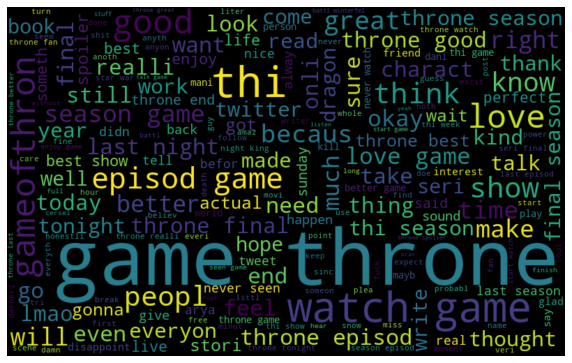

In [43]:
all_words = ' '.join([text for text in positive_df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
Very_positive = got.loc[got['polarity'] >= 0.8] 

In [49]:
Very_positive.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet,polarity,subjectivity
3146,It's beginning to look like a great time to be a fantasy-TV fan https://t.co/tvX1xUXiiV,87,18327,en,begin look like great time fantasi http xuxiiv,0.8,0.75
3153,It's beginning to look like a great time to be a fantasy-TV fan https://t.co/hAq35zIWA6,87,18327,en,begin look like great time fantasi http ziwa,0.8,0.75
3623,"TBH, @BeeBabs said it best 👇#GoT \nhttps://t.co/dwSvYHKoY3",57,10421,en,said best #got http dwsvyhkoy,1.0,0.30
3802,#GameOfThrones isn’t a sitcom! These actors risk their balls!!! *LOLs* https://t.co/dIeqJ20yPZ,94,882134,en,#gameofthron sitcom these actor risk their ball lol http dieqj,0.8,0.70
4996,I voted for #BestStyleGoT on @TheTylt—#GameOfThrones has the best costumes https://t.co/eCVsSliFJ4,98,327461,en,vote #beststylegot #gameofthron best costum http ecvsslifj,1.0,0.30


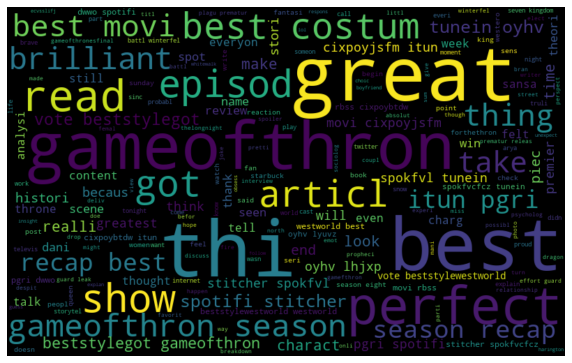

In [50]:
all_words = ' '.join([text for text in Very_positive['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
Very_NEGATIVE = got.loc[got['polarity'] <= -0.9] 

In [52]:
Very_NEGATIVE.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet,polarity,subjectivity
40256,This Week’s Worst Person in Westeros: Jon Snow https://t.co/WTg7AQkJra https://t.co/gd3V3n1QiB,70,188766,en,thi week worst person westero snow http aqkjra http,-1.0,1.0
63305,This bleak site tracks the days since George R.R. Martin wrote a #GameofThrones Book: https://t.co/tjeoeYi48N https://t.co/47wyix5SWn,109,68161,en,thi bleak site track day sinc georg martin wrote #gameofthron book http tjeoeyi http wyix,-1.0,1.0
158694,THIS IS SO EVIL. #NerdgasmNews #TheMOShow @MoRoRadio https://t.co/IolHN0X7gy,76,40676,en,thi evil #nerdgasmnew #themoshow http iolhn,-1.0,1.0
198645,"If the cruel fates of #GameOfThrones have taught us anything, it<U+2019>s to be careful what you wish for https://t.co/hMjrPYzT05",122,18318,en,cruel fate #gameofthron have taught anyth care what wish http hmjrpyzt,-1.0,1.0
227860,"If the cruel fates of #GameOfThrones have taught us anything, it<U+2019>s to be careful what you wish for https://t.co/AaoQQZB9un",122,18306,en,cruel fate #gameofthron have taught anyth care what wish http aaoqqzb,-1.0,1.0


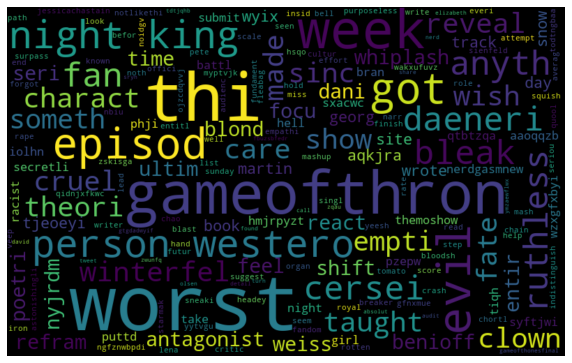

In [53]:
all_words = ' '.join([text for text in Very_NEGATIVE['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [55]:
Subjectiveness = got.loc[got['subjectivity'] >= 0.8] 

In [56]:
Subjectiveness.head()

,text,display_text_width,favourites_count,account_lang,tidy_tweet,polarity,subjectivity
1139,I'm sorry this is the lamest shit https://t.co/98ocaR390G,57,36208,en,sorri thi lamest shit http ocar,-0.2,0.800000
1573,"#GameofThrones fans! Therapist @andrea_schneid shrewdly explores narcissism, psychopathy and post-traumatic growth among the characters in her #GOT psychology series. Be sure to check it out! ♥️ h...",218,22044,en,#gameofthron fan therapist shrewdli explor narciss psychopathi post traumat growth among charact #got psycholog seri sure check http riglpesmlr,0.5,0.888889
4149,For those of you who missed ⁦@JReidNFL⁩ on PA’s show yesterday. Here’s the link to the podcast and just jump to about the 43 min mark. Check it out it’s great!! Nice job JR! https://t.co/Am0gA3oHLO,198,19064,en,those miss show yesterday here link podcast just jump about mark check great nice http ohlo,0.7,0.875000
4809,-Final set of links for this thread: https://t.co/gOSelbDiSQ\nhttps://t.co/xCIr5CeSNx\nhttps://t.co/RSyFeCaqEo\nhttps://t.co/yw8B3dXAvd\nhttps://t.co/pnSLlDfLfC\nhttps://t.co/xKFTLgYVI3\nhttps://t...,228,12729,en,final link thi thread http goselbdisq http xcir cesnx http rsyfecaqeo http dxavd http pnslldflfc http xkftlgyvi http xodqr ampb http cugkdgg,0.0,1.000000
7261,Proud boyfriend moment. @KristenGeil https://t.co/ADHOL4yMgJ https://t.co/mZ594StrVy,60,24110,en,proud boyfriend moment http adhol ymgj http strvi,0.8,1.000000


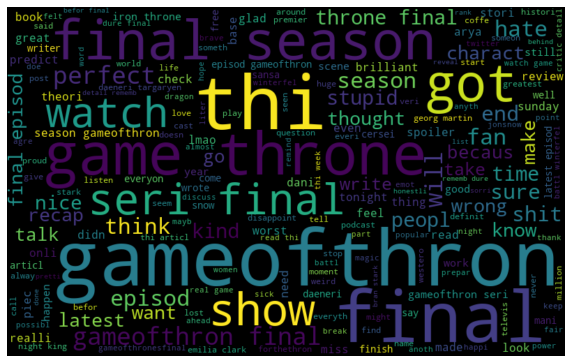

In [57]:
all_words = ' '.join([text for text in Subjectiveness['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()